In [1]:
import torch
from math import pi, e
from EquationAndDomain import OnePointInitialCondition, MainEquation, TwoPointInitialCondition
from NN_Solver import NN_Solver
from nth_derivative import nth_derivative

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x)$$

$$ u(0)=0, u(1)= sin(1)*exp(-0.2) $$

$$ true\_solution = exp(-\frac{x}{5})*sin(x)$$

Here:

NN - Neural network output for input x. unknown function u is approximated by an NN

Epoch 0/39:
train Loss: 0.1669
valid Loss: 0.0789
Epoch 1/39:
train Loss: 0.1032
valid Loss: 0.0753
Epoch 2/39:
train Loss: 0.0672
valid Loss: 0.0504
Epoch 3/39:
train Loss: 0.0632
valid Loss: 0.0109
Epoch 4/39:
train Loss: 0.0395
valid Loss: 0.0272
Epoch 5/39:
train Loss: 0.0353
valid Loss: 0.0241
Epoch 6/39:
train Loss: 0.0381
valid Loss: 0.0311
Epoch 7/39:
train Loss: 0.0240
valid Loss: 0.0281
Epoch 8/39:
train Loss: 0.0171
valid Loss: 0.0172
Epoch 9/39:
train Loss: 0.0230
valid Loss: 0.0139
Epoch 10/39:
train Loss: 0.0198
valid Loss: 0.0160
Epoch 11/39:
train Loss: 0.0113
valid Loss: 0.0139
Epoch 12/39:
train Loss: 0.0160
valid Loss: 0.0085
Epoch 13/39:
train Loss: 0.0122
valid Loss: 0.0095
Epoch 14/39:
train Loss: 0.0083
valid Loss: 0.0093
Epoch 15/39:
train Loss: 0.0093
valid Loss: 0.0066
Epoch 16/39:
train Loss: 0.0067
valid Loss: 0.0041
Epoch 17/39:
train Loss: 0.0063
valid Loss: 0.0044
Epoch 18/39:
train Loss: 0.0054
valid Loss: 0.0050
Epoch 19/39:
train Loss: 0.0041
valid Los

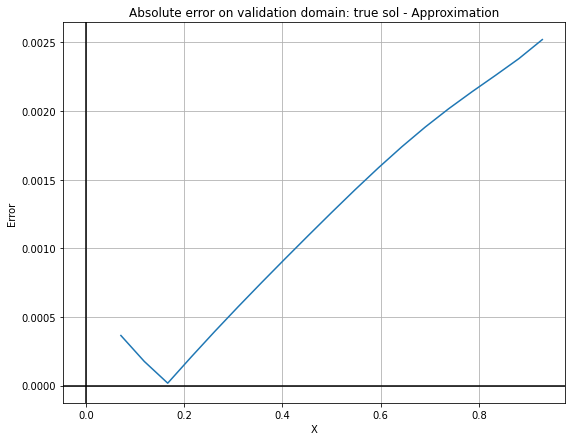

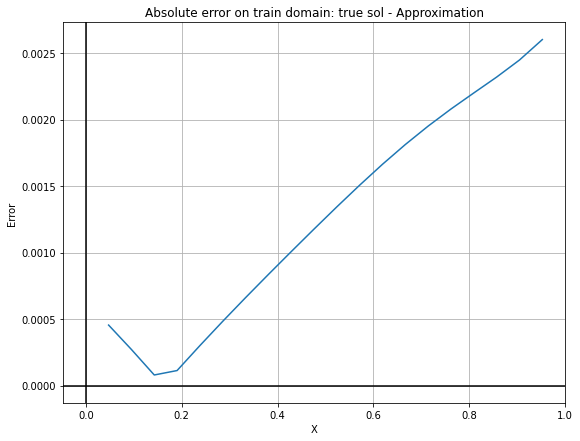

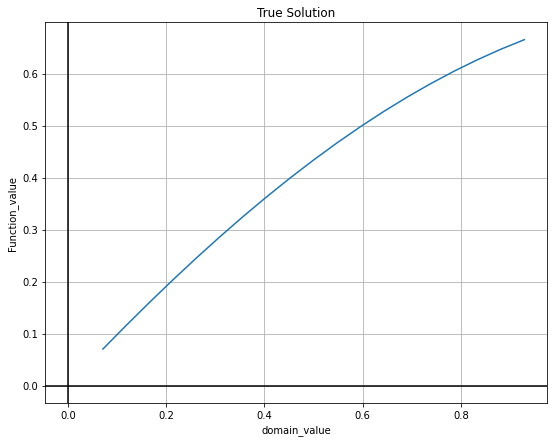

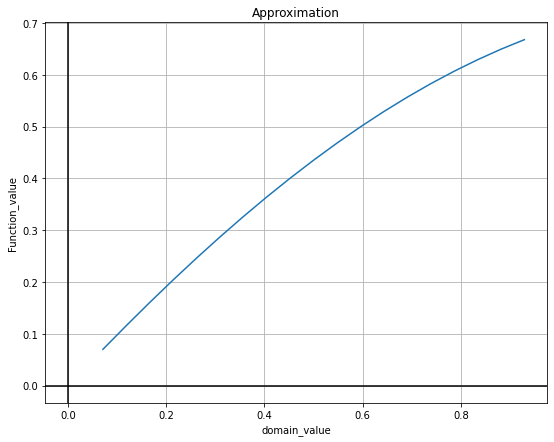

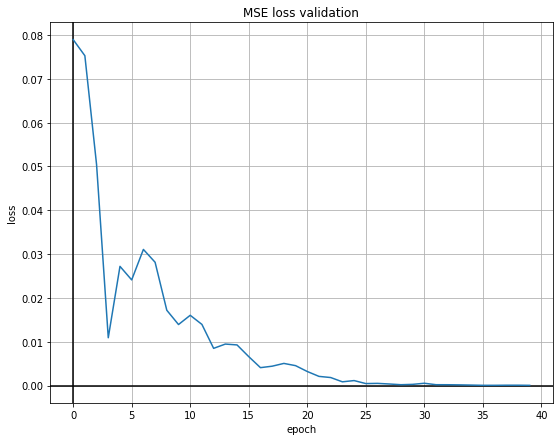

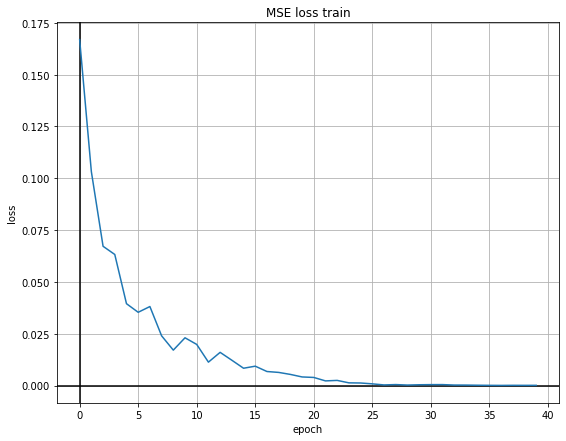

In [7]:
    left_bound = 0
    right_bound = 1
    main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
    n_points = 20
    main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

    first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
    first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

    second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
        torch.Tensor([1])
    ) * torch.exp(torch.Tensor([-0.2]))
    second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

    boundary_conditions = [first_init_cond, second_init_cond]

    true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
    nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
    nn_ode_solver.fit()

Train max absolute error: 0.002601325511932373
Valid max absolute error: 0.0025202035903930664


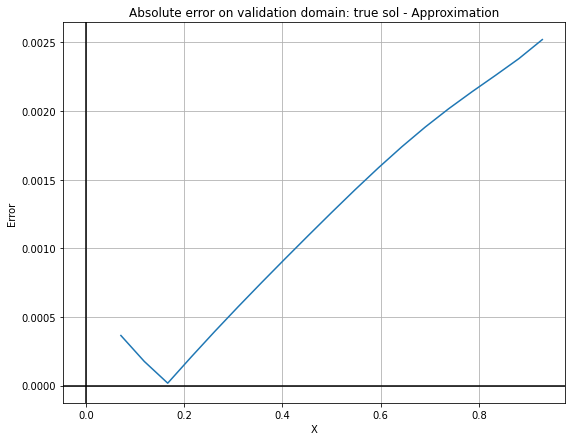

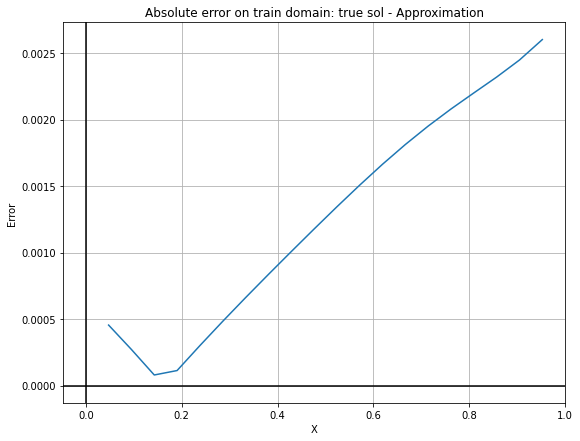

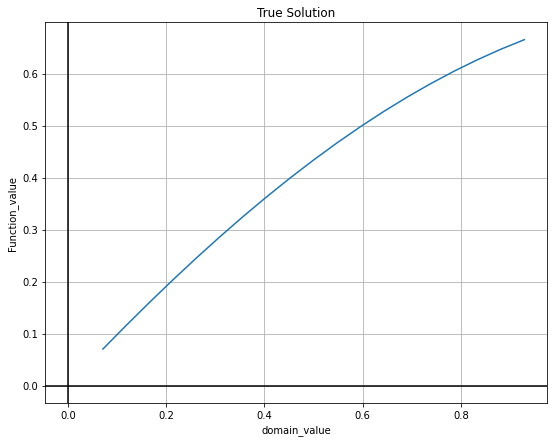

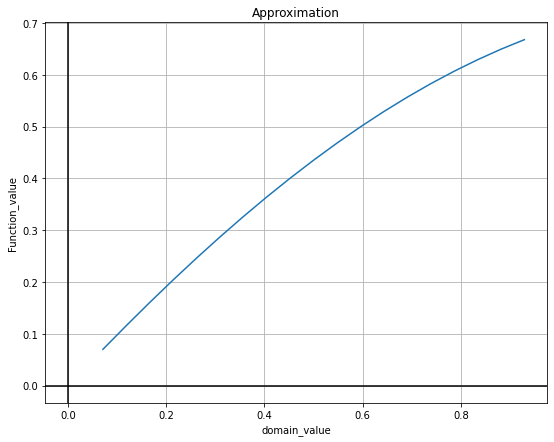

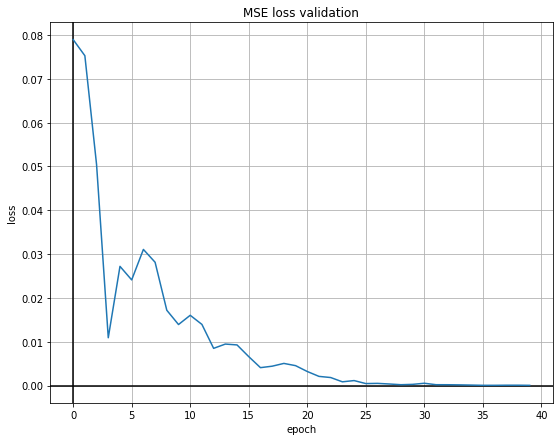

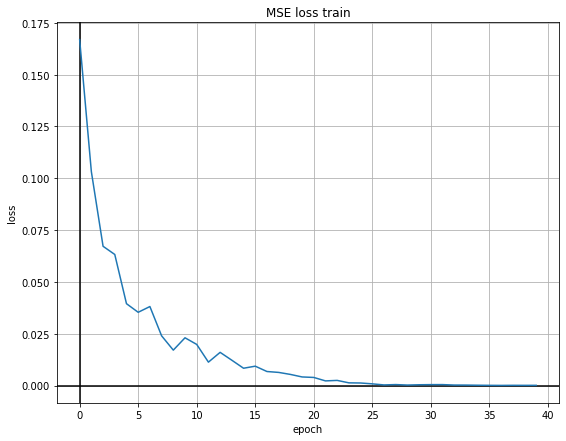

In [8]:
nn_ode_solver.make_report()

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x)$$

$$ u(0)=0, u'(0)=1 $$ 

$$ func\_appr = x + x^2 * NN(x)$$

$$ x \in [0,2] $$
$$ true\_solution = exp(-\frac{x}{5})*sin(x)$$

In [2]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 0.3857
valid Loss: 0.3289
Epoch 1/39:
train Loss: 0.3765
valid Loss: 0.1933
Epoch 2/39:
train Loss: 0.1171
valid Loss: 0.2050
Epoch 3/39:
train Loss: 0.1718
valid Loss: 0.1034
Epoch 4/39:
train Loss: 0.1727
valid Loss: 0.1378
Epoch 5/39:
train Loss: 0.0598
valid Loss: 0.0755
Epoch 6/39:
train Loss: 0.1066
valid Loss: 0.0924
Epoch 7/39:
train Loss: 0.0793
valid Loss: 0.0541
Epoch 8/39:
train Loss: 0.0785
valid Loss: 0.0644
Epoch 9/39:
train Loss: 0.0317
valid Loss: 0.0352
Epoch 10/39:
train Loss: 0.0461
valid Loss: 0.0428
Epoch 11/39:
train Loss: 0.0336
valid Loss: 0.0179
Epoch 12/39:
train Loss: 0.0269
valid Loss: 0.0256
Epoch 13/39:
train Loss: 0.0121
valid Loss: 0.0131
Epoch 14/39:
train Loss: 0.0198
valid Loss: 0.0067
Epoch 15/39:
train Loss: 0.0068
valid Loss: 0.0140
Epoch 16/39:
train Loss: 0.0095
valid Loss: 0.0009
Epoch 17/39:
train Loss: 0.0065
valid Loss: 0.0072
Epoch 18/39:
train Loss: 0.0030
valid Loss: 0.0061
Epoch 19/39:
train Loss: 0.0064
valid Los

Train max absolute error: 0.005396366119384766
Valid max absolute error: 0.005401492118835449


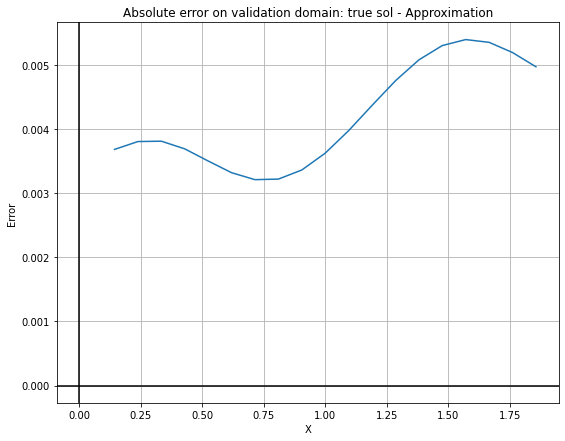

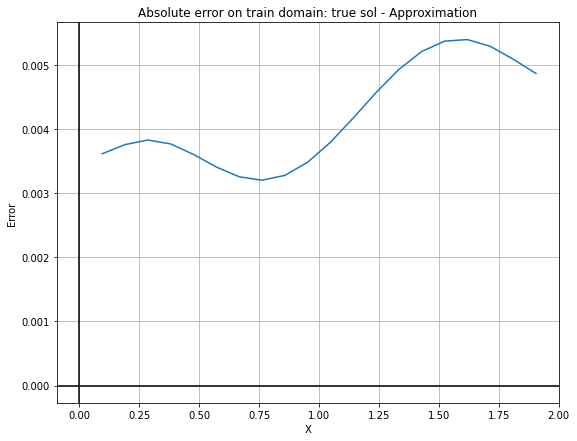

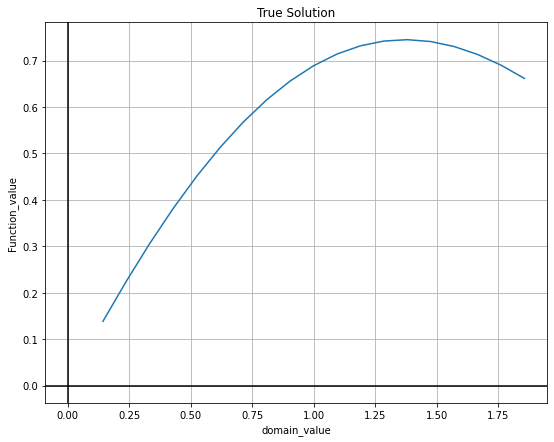

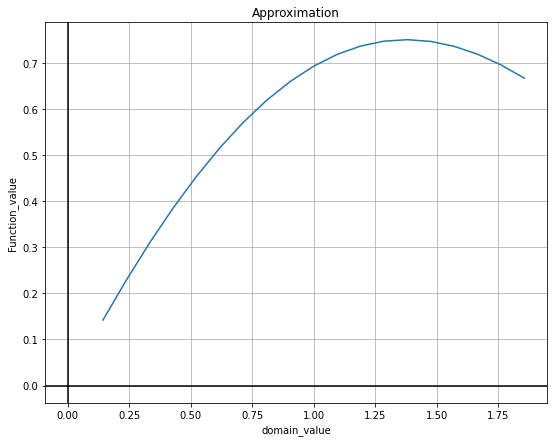

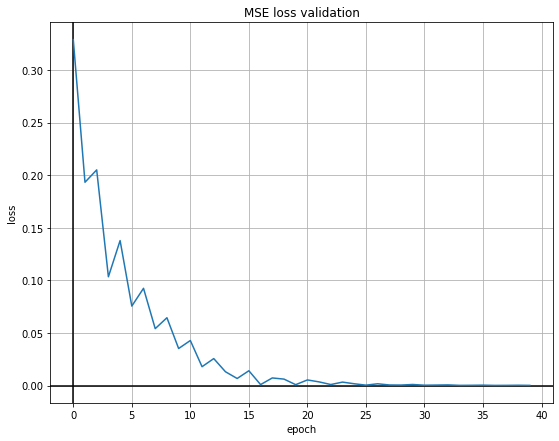

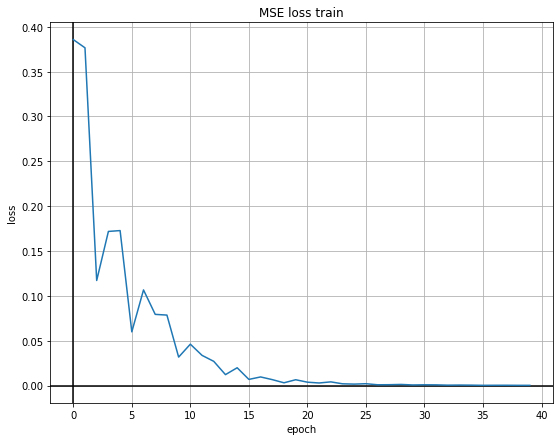

In [3]:
nn_ode_solver.make_report()

$$ x' + 0.2x = exp(-0.2x)cos(x)$$
$$ x(0) = 0, x \in [0.2] $$
$$ true\_solution = exp(-\frac{x}{5})*sin(x) $$

In [4]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 0.2137
valid Loss: 0.0559
Epoch 1/39:
train Loss: 0.1014
valid Loss: 0.0406
Epoch 2/39:
train Loss: 0.0360
valid Loss: 0.0196
Epoch 3/39:
train Loss: 0.0328
valid Loss: 0.0267
Epoch 4/39:
train Loss: 0.0325
valid Loss: 0.0236
Epoch 5/39:
train Loss: 0.0267
valid Loss: 0.0137
Epoch 6/39:
train Loss: 0.0163
valid Loss: 0.0173
Epoch 7/39:
train Loss: 0.0191
valid Loss: 0.0100
Epoch 8/39:
train Loss: 0.0100
valid Loss: 0.0107
Epoch 9/39:
train Loss: 0.0060
valid Loss: 0.0069
Epoch 10/39:
train Loss: 0.0082
valid Loss: 0.0032
Epoch 11/39:
train Loss: 0.0035
valid Loss: 0.0045
Epoch 12/39:
train Loss: 0.0040
valid Loss: 0.0043
Epoch 13/39:
train Loss: 0.0039
valid Loss: 0.0026
Epoch 14/39:
train Loss: 0.0044
valid Loss: 0.0018
Epoch 15/39:
train Loss: 0.0024
valid Loss: 0.0026
Epoch 16/39:
train Loss: 0.0027
valid Loss: 0.0027
Epoch 17/39:
train Loss: 0.0029
valid Loss: 0.0018
Epoch 18/39:
train Loss: 0.0023
valid Loss: 0.0009
Epoch 19/39:
train Loss: 0.0020
valid Los

Train max absolute error: 0.010391712188720703
Valid max absolute error: 0.009661495685577393


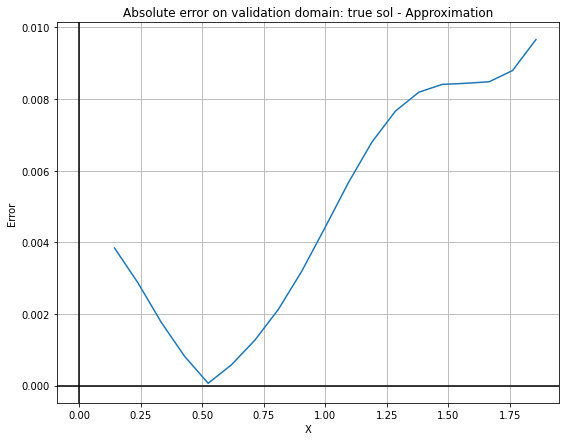

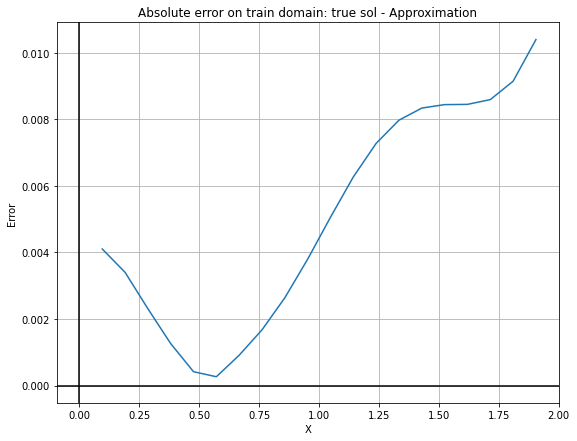

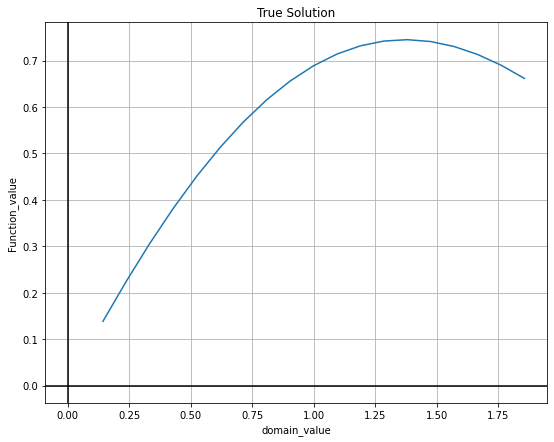

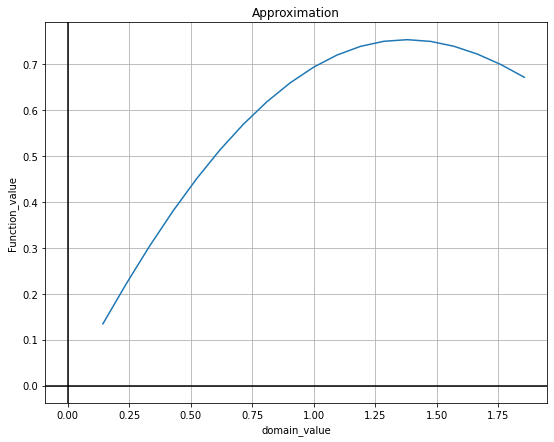

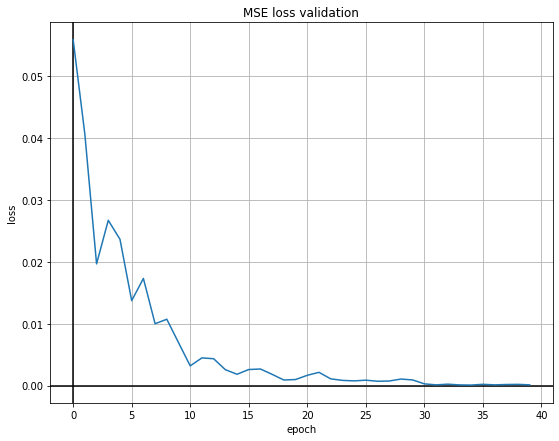

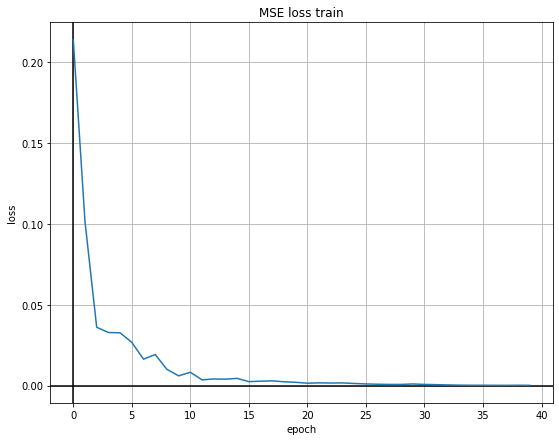

In [5]:
nn_ode_solver.make_report()

$$x''+4x=cos(2t)$$ 
$$ x(0)=1, x'(0)=-1$$
$$true\_solution = \frac{1}{4}*x * sin(2*x) + cos(2*x) - \frac{1}{2}sin(2*x)$$

In [8]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + 4 * function
    - torch.cos(2*variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 1
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 0.8010
valid Loss: 0.8702
Epoch 1/39:
train Loss: 0.8058
valid Loss: 0.6190
Epoch 2/39:
train Loss: 0.4742
valid Loss: 0.2107
Epoch 3/39:
train Loss: 0.3494
valid Loss: 0.2169
Epoch 4/39:
train Loss: 0.1194
valid Loss: 0.0832
Epoch 5/39:
train Loss: 0.1145
valid Loss: 0.1707
Epoch 6/39:
train Loss: 0.1633
valid Loss: 0.1026
Epoch 7/39:
train Loss: 0.1197
valid Loss: 0.1080
Epoch 8/39:
train Loss: 0.1457
valid Loss: 0.0585
Epoch 9/39:
train Loss: 0.0981
valid Loss: 0.0737
Epoch 10/39:
train Loss: 0.1076
valid Loss: 0.0795
Epoch 11/39:
train Loss: 0.0787
valid Loss: 0.0685
Epoch 12/39:
train Loss: 0.0672
valid Loss: 0.0620
Epoch 13/39:
train Loss: 0.0672
valid Loss: 0.0551
Epoch 14/39:
train Loss: 0.0644
valid Loss: 0.0506
Epoch 15/39:
train Loss: 0.0509
valid Loss: 0.0396
Epoch 16/39:
train Loss: 0.0544
valid Loss: 0.0387
Epoch 17/39:
train Loss: 0.0569
valid Loss: 0.0399
Epoch 18/39:
train Loss: 0.0558
valid Loss: 0.0366
Epoch 19/39:
train Loss: 0.0478
valid Los

Train max absolute error: 0.06475871801376343
Valid max absolute error: 0.06445693969726562


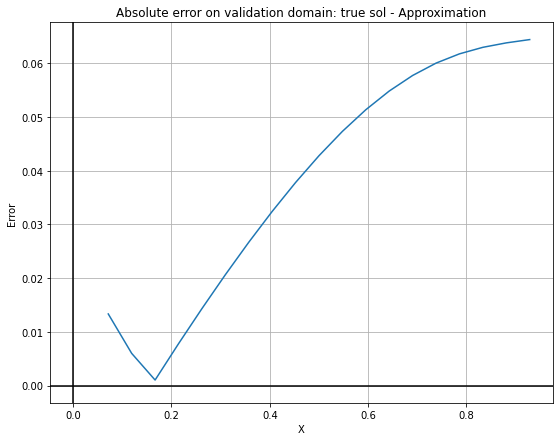

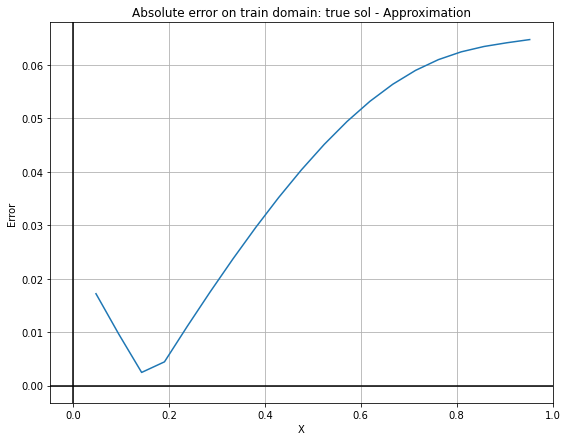

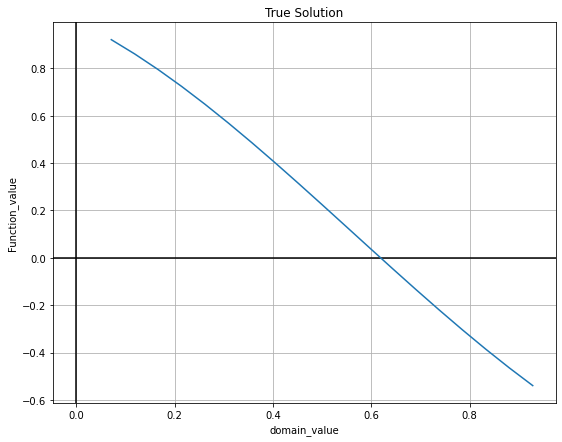

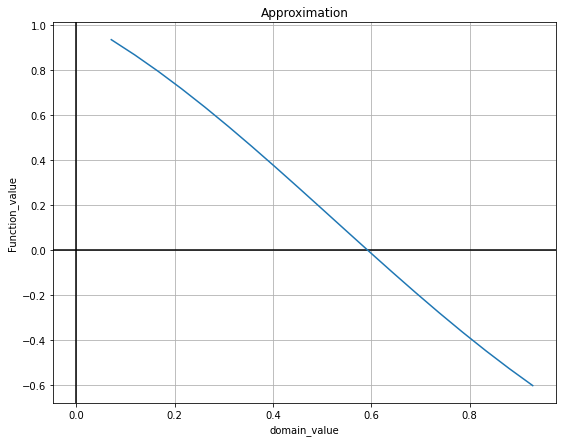

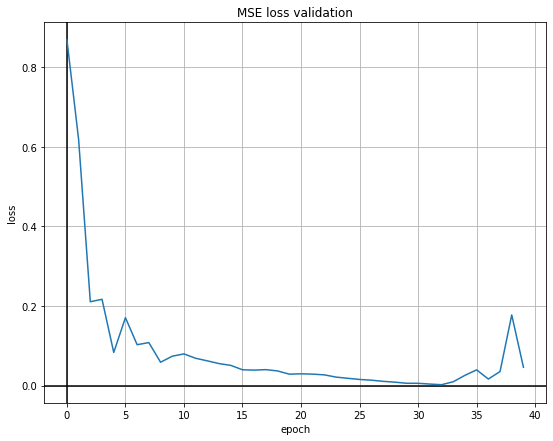

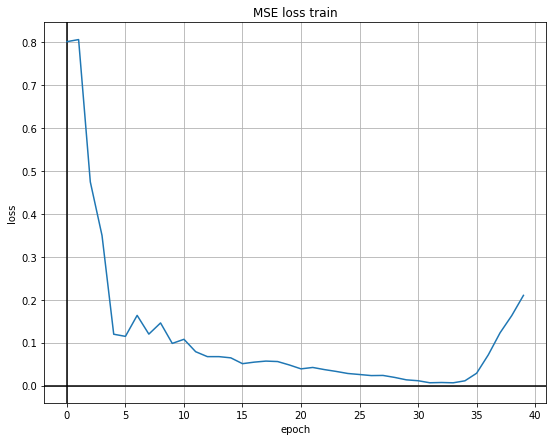

In [9]:
nn_ode_solver.make_report()

$$x''' - 3x'' + 3x' -x = exp(t)$$ 
$$x(0)=1, x'(0)=-1, x''(0)=1$$
$$ func\_appr = 1 - x + \frac{x^2}{2} + x^3 * NN(x)$$
$$true\_solution = exp(x) * (\frac{1}{6}*x^3 + 2*x^2-2*x+1)$$

In [10]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    - 3 * nth_derivative(function, variable, 2)
    + 3 * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 1
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) -1
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: torch.exp(x) * (1/6*x*x*x + 1 - 2* x + 2 * x*x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 4.6410
valid Loss: 5.4465
Epoch 1/39:
train Loss: 5.3440
valid Loss: 4.6149
Epoch 2/39:
train Loss: 4.0283
valid Loss: 4.0854
Epoch 3/39:
train Loss: 3.8686
valid Loss: 4.0748
Epoch 4/39:
train Loss: 4.1527
valid Loss: 3.9609
Epoch 5/39:
train Loss: 4.1274
valid Loss: 3.8808
Epoch 6/39:
train Loss: 3.9979
valid Loss: 3.8776
Epoch 7/39:
train Loss: 3.8634
valid Loss: 3.8648
Epoch 8/39:
train Loss: 3.8311
valid Loss: 3.8553
Epoch 9/39:
train Loss: 3.9041
valid Loss: 3.8537
Epoch 10/39:
train Loss: 3.9069
valid Loss: 3.8090
Epoch 11/39:
train Loss: 3.8963
valid Loss: 3.7955
Epoch 12/39:
train Loss: 3.8303
valid Loss: 3.7800
Epoch 13/39:
train Loss: 3.8094
valid Loss: 3.7799
Epoch 14/39:
train Loss: 3.8361
valid Loss: 3.7926
Epoch 15/39:
train Loss: 3.8285
valid Loss: 3.7855
Epoch 16/39:
train Loss: 3.8068
valid Loss: 3.7507
Epoch 17/39:
train Loss: 3.7985
valid Loss: 3.7338
Epoch 18/39:
train Loss: 3.7785
valid Loss: 3.7171
Epoch 19/39:
train Loss: 3.7523
valid Los

Train max absolute error: 2.0881011486053467
Valid max absolute error: 1.8874330520629883


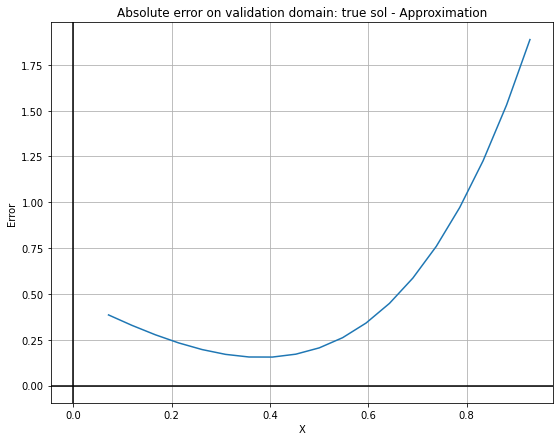

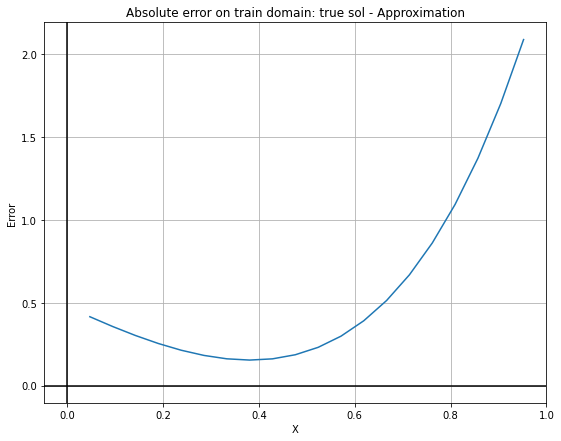

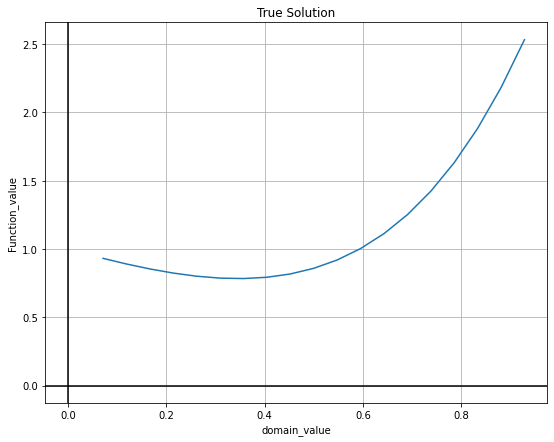

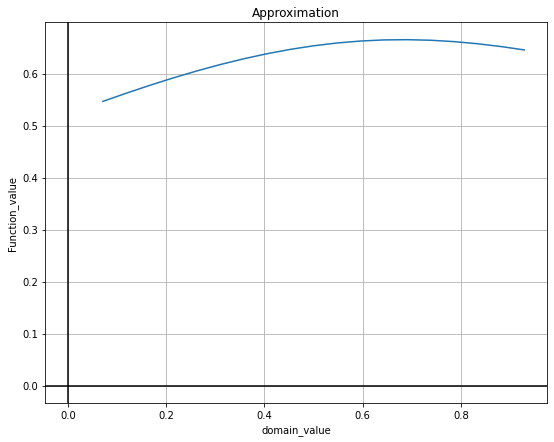

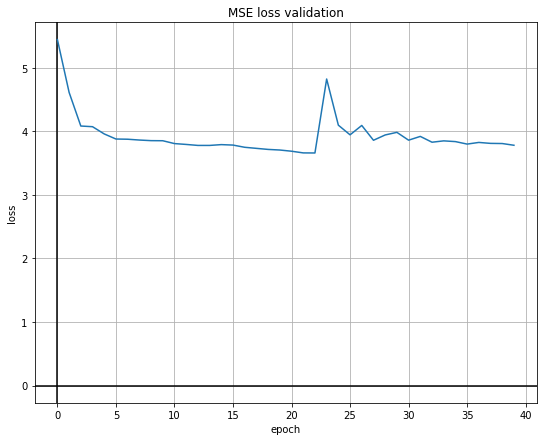

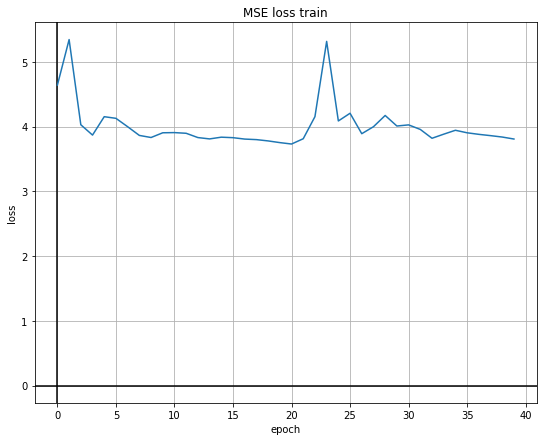

In [11]:
nn_ode_solver.make_report()

$$u'' + u = -x $$ 
$$u(0) = u(1) = 0$$
$$true\_solution = \frac{sin(x)}{sin(1)} - x$$

In [12]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    + variable
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 0.1225
valid Loss: 0.4554
Epoch 1/39:
train Loss: 0.3551
valid Loss: 0.0848
Epoch 2/39:
train Loss: 0.1842
valid Loss: 0.1608
Epoch 3/39:
train Loss: 0.1308
valid Loss: 0.0912
Epoch 4/39:
train Loss: 0.0284
valid Loss: 0.0677
Epoch 5/39:
train Loss: 0.0860
valid Loss: 0.0436
Epoch 6/39:
train Loss: 0.0458
valid Loss: 0.0240
Epoch 7/39:
train Loss: 0.0443
valid Loss: 0.0547
Epoch 8/39:
train Loss: 0.0325
valid Loss: 0.0175
Epoch 9/39:
train Loss: 0.0162
valid Loss: 0.0174
Epoch 10/39:
train Loss: 0.0321
valid Loss: 0.0257
Epoch 11/39:
train Loss: 0.0119
valid Loss: 0.0083
Epoch 12/39:
train Loss: 0.0156
valid Loss: 0.0098
Epoch 13/39:
train Loss: 0.0136
valid Loss: 0.0134
Epoch 14/39:
train Loss: 0.0069
valid Loss: 0.0057
Epoch 15/39:
train Loss: 0.0050
valid Loss: 0.0041
Epoch 16/39:
train Loss: 0.0083
valid Loss: 0.0050
Epoch 17/39:
train Loss: 0.0027
valid Loss: 0.0031
Epoch 18/39:
train Loss: 0.0030
valid Loss: 0.0047
Epoch 19/39:
train Loss: 0.0043
valid Los

Train max absolute error: 0.006355080753564835
Valid max absolute error: 0.006333652883768082


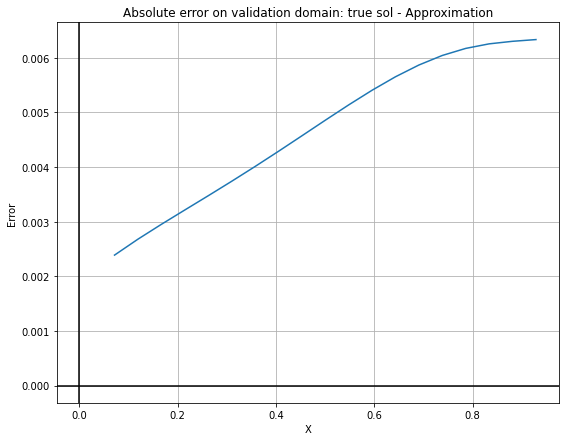

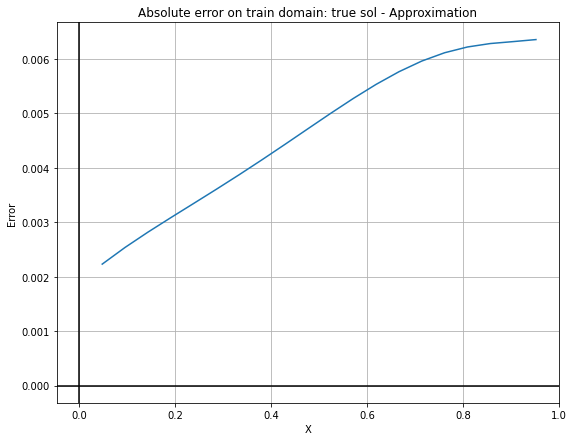

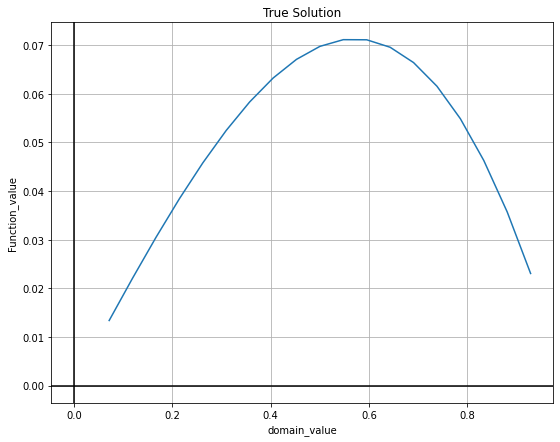

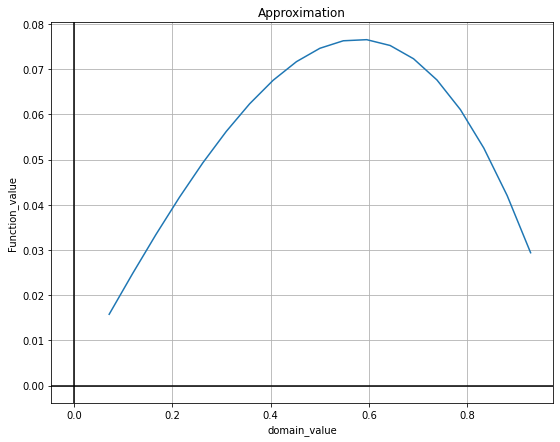

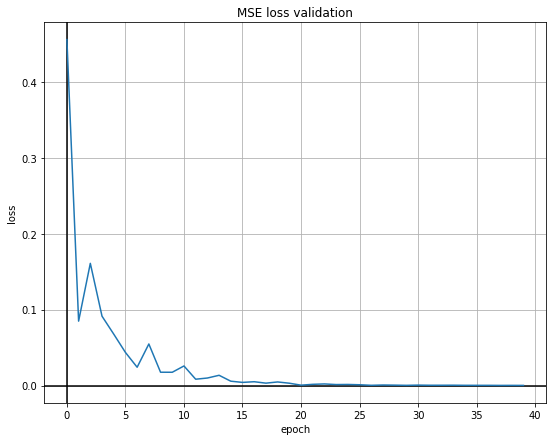

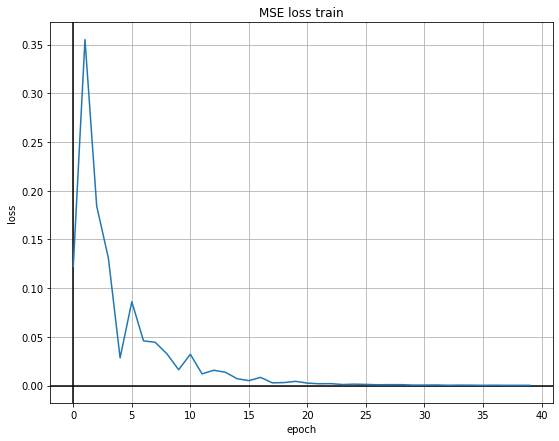

In [13]:
nn_ode_solver.make_report()

$$x'' + x' = 1$$
$$ x'(0) = 0, x(\frac{\pi}{2})-x'(\frac{\pi}{2})= 2$$
$$ true\_solution = 1 + cos(x) $$

In [14]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    - 1
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 1.3174
valid Loss: 0.1779
Epoch 1/39:
train Loss: 0.4277
valid Loss: 0.1440
Epoch 2/39:
train Loss: 0.2440
valid Loss: 0.0523
Epoch 3/39:
train Loss: 0.2104
valid Loss: 0.1813
Epoch 4/39:
train Loss: 0.0641
valid Loss: 0.1480
Epoch 5/39:
train Loss: 0.1220
valid Loss: 0.0313
Epoch 6/39:
train Loss: 0.1056
valid Loss: 0.0965
Epoch 7/39:
train Loss: 0.0349
valid Loss: 0.0552
Epoch 8/39:
train Loss: 0.0662
valid Loss: 0.0194
Epoch 9/39:
train Loss: 0.0383
valid Loss: 0.0617
Epoch 10/39:
train Loss: 0.0368
valid Loss: 0.0059
Epoch 11/39:
train Loss: 0.0202
valid Loss: 0.0298
Epoch 12/39:
train Loss: 0.0222
valid Loss: 0.0202
Epoch 13/39:
train Loss: 0.0204
valid Loss: 0.0046
Epoch 14/39:
train Loss: 0.0078
valid Loss: 0.0207
Epoch 15/39:
train Loss: 0.0140
valid Loss: 0.0028
Epoch 16/39:
train Loss: 0.0083
valid Loss: 0.0114
Epoch 17/39:
train Loss: 0.0055
valid Loss: 0.0067
Epoch 18/39:
train Loss: 0.0089
valid Loss: 0.0022
Epoch 19/39:
train Loss: 0.0016
valid Los

Train max absolute error: 0.007646679878234863
Valid max absolute error: 0.007645010948181152


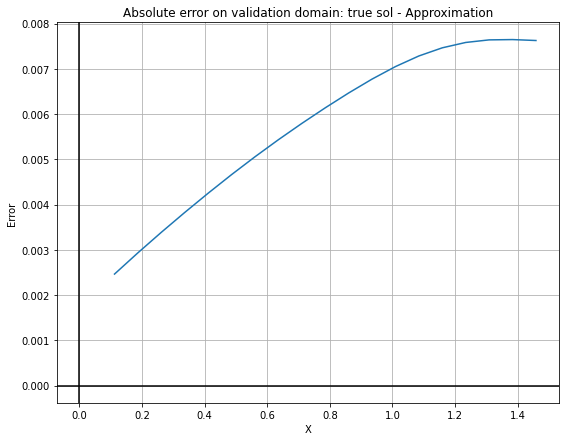

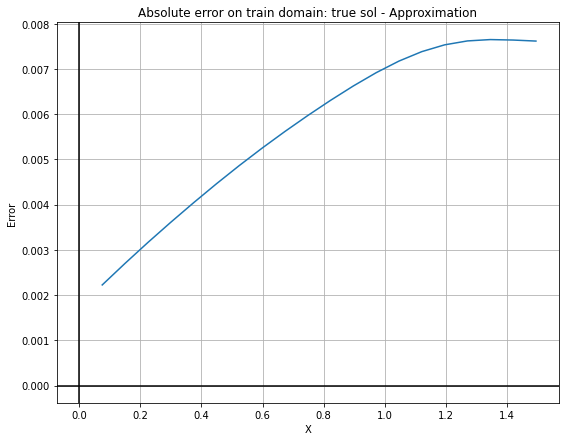

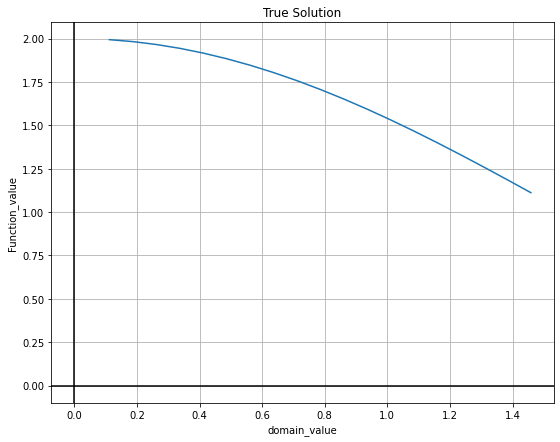

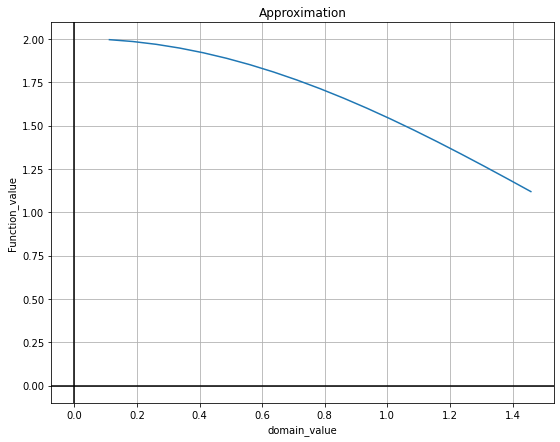

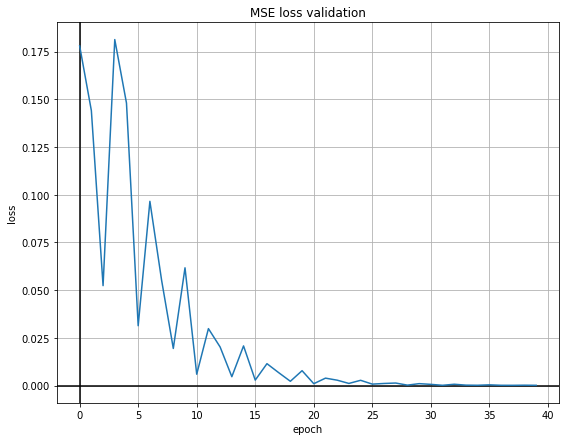

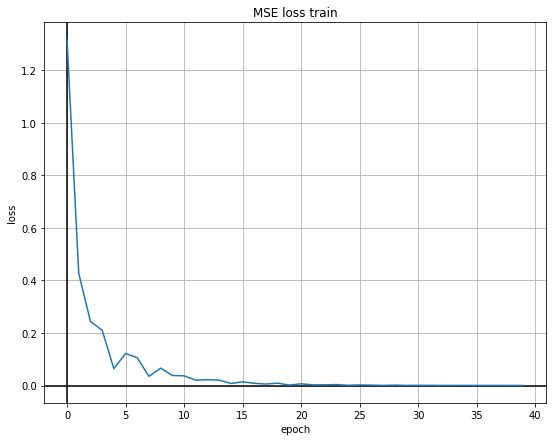

In [15]:
nn_ode_solver.make_report()

$$ y'' -y = 4exp(x)$$
$$ y(0) = 0, y'(0) = 1 $$
$$ true\_solution = 2 * x * exp(x) - sinh(x) $$

In [17]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    - function
    - 4 * torch.exp(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 25.3677
valid Loss: 23.0430
Epoch 1/39:
train Loss: 22.5987
valid Loss: 15.6978
Epoch 2/39:
train Loss: 16.7844
valid Loss: 8.8070
Epoch 3/39:
train Loss: 7.3606
valid Loss: 8.7740
Epoch 4/39:
train Loss: 10.2249
valid Loss: 9.9612
Epoch 5/39:
train Loss: 10.0998
valid Loss: 9.8880
Epoch 6/39:
train Loss: 9.9533
valid Loss: 9.5640
Epoch 7/39:
train Loss: 8.6342
valid Loss: 7.6810
Epoch 8/39:
train Loss: 7.4141
valid Loss: 6.1514
Epoch 9/39:
train Loss: 5.8032
valid Loss: 4.4533
Epoch 10/39:
train Loss: 5.5779
valid Loss: 4.0847
Epoch 11/39:
train Loss: 3.5749
valid Loss: 3.5470
Epoch 12/39:
train Loss: 3.8720
valid Loss: 3.9311
Epoch 13/39:
train Loss: 4.3136
valid Loss: 3.0271
Epoch 14/39:
train Loss: 2.9164
valid Loss: 1.8540
Epoch 15/39:
train Loss: 2.6620
valid Loss: 2.0037
Epoch 16/39:
train Loss: 1.6120
valid Loss: 1.4567
Epoch 17/39:
train Loss: 1.6517
valid Loss: 1.6352
Epoch 18/39:
train Loss: 1.6161
valid Loss: 0.8988
Epoch 19/39:
train Loss: 1.1797
va

Train max absolute error: 0.9067137241363525
Valid max absolute error: 0.8836250305175781


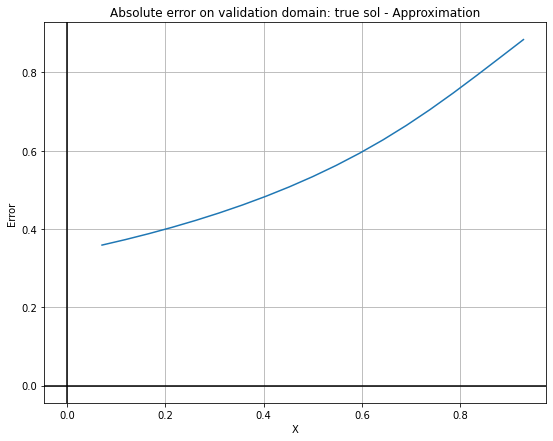

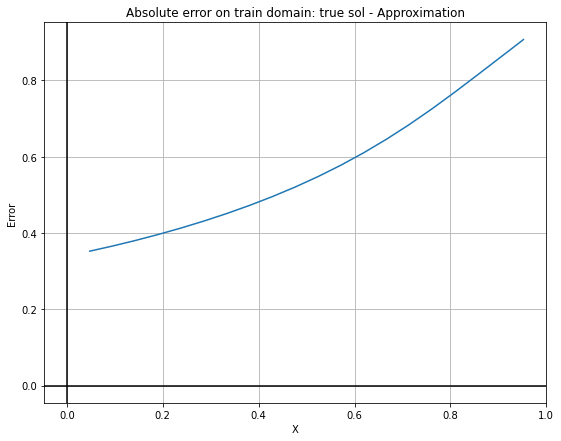

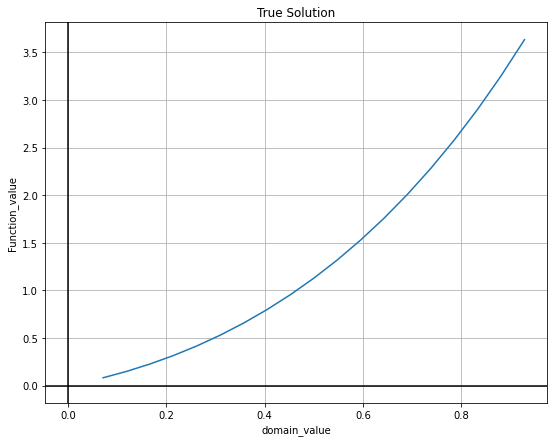

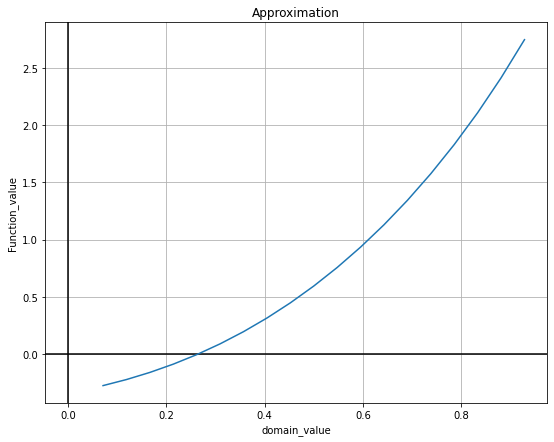

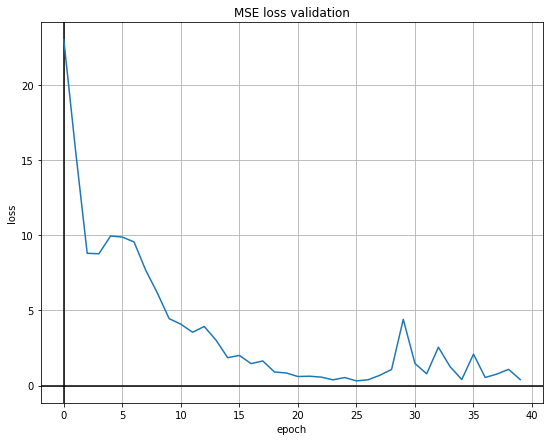

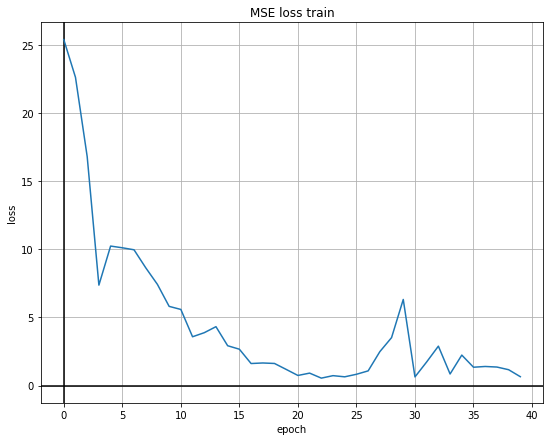

In [18]:
nn_ode_solver.make_report()

$$ (1+x^2)y''-2xy = 0 $$
$$ y(0)=0, y'(0)=3 $$
$$true\_solution = x^3 + 3*x$$

In [19]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (1 + variable*variable) * nth_derivative(function, variable, 2)
    - 2 * variable * function
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 3
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: x * x * x + 3 * x
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 6.8335
valid Loss: 6.5531
Epoch 1/39:
train Loss: 9.4341
valid Loss: 7.6323
Epoch 2/39:
train Loss: 7.5766
valid Loss: 6.8962
Epoch 3/39:
train Loss: 5.7533
valid Loss: 4.3146
Epoch 4/39:
train Loss: 4.2428
valid Loss: 4.3728
Epoch 5/39:
train Loss: 4.5931
valid Loss: 3.4773
Epoch 6/39:
train Loss: 2.8311
valid Loss: 3.1009
Epoch 7/39:
train Loss: 2.9806
valid Loss: 2.6724
Epoch 8/39:
train Loss: 2.7089
valid Loss: 1.8548
Epoch 9/39:
train Loss: 2.4500
valid Loss: 1.5793
Epoch 10/39:
train Loss: 2.1295
valid Loss: 1.5201
Epoch 11/39:
train Loss: 2.2885
valid Loss: 2.0423
Epoch 12/39:
train Loss: 1.9047
valid Loss: 2.2825
Epoch 13/39:
train Loss: 1.9648
valid Loss: 1.1944
Epoch 14/39:
train Loss: 1.7601
valid Loss: 0.9444
Epoch 15/39:
train Loss: 2.4847
valid Loss: 1.1773
Epoch 16/39:
train Loss: 2.5547
valid Loss: 2.2752
Epoch 17/39:
train Loss: 2.0448
valid Loss: 3.0416
Epoch 18/39:
train Loss: 2.9288
valid Loss: 2.0430
Epoch 19/39:
train Loss: 2.0953
valid Los

Train max absolute error: 0.6346697807312012
Valid max absolute error: 0.5973925590515137


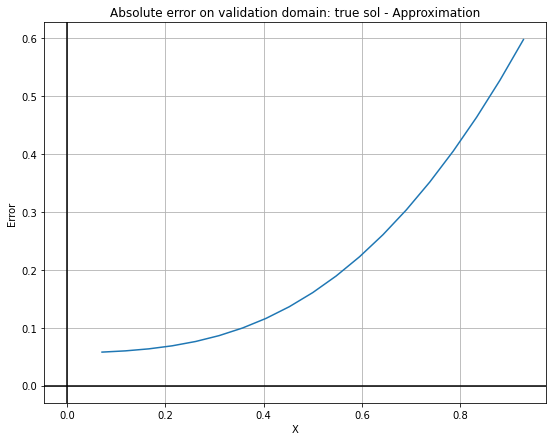

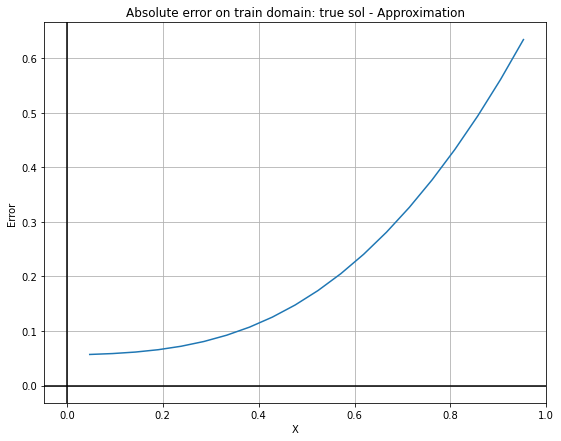

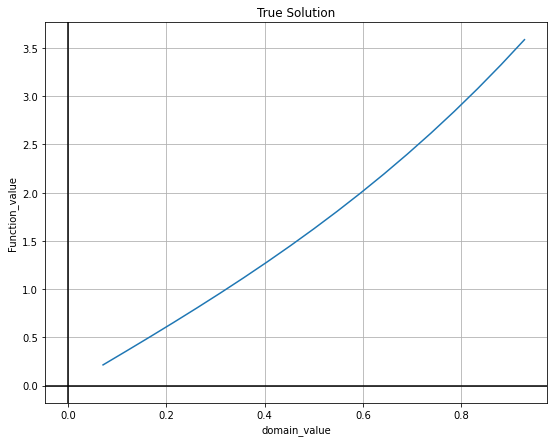

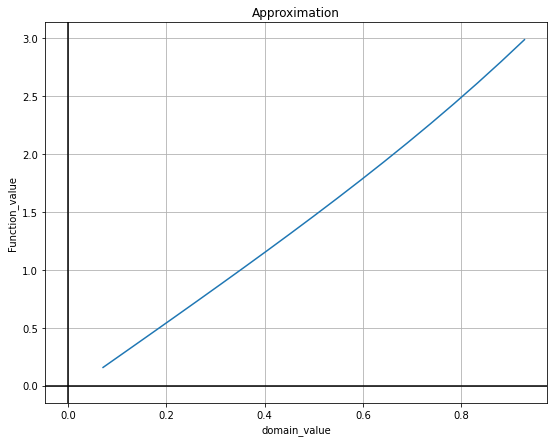

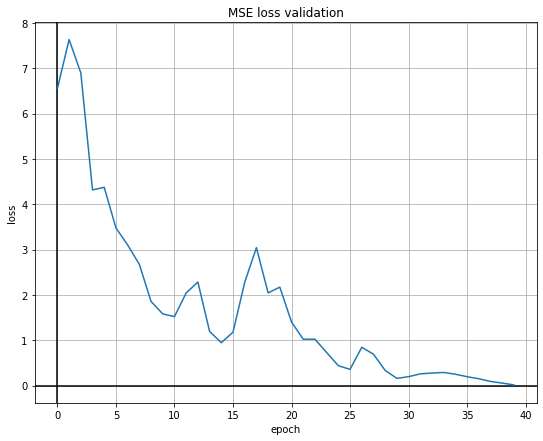

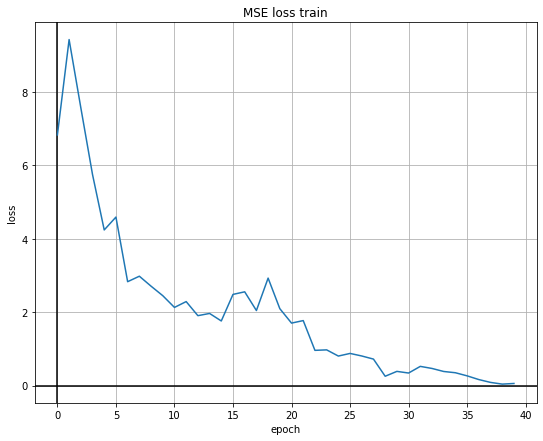

In [20]:
nn_ode_solver.make_report()

$$yy''- (y')^2 = y^4$$
$$ y(0) = 1, y'(0) = 0$$
$$ true\_sol =  \frac{1}{cos(x)}$$

In [21]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: function * nth_derivative(function, variable, 2)
    - (nth_derivative(function, variable, 1))**2 - function**4
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 1
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 1/torch.cos(x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 0.3379
valid Loss: 0.2009
Epoch 1/39:
train Loss: 0.1661
valid Loss: 0.1359
Epoch 2/39:
train Loss: 0.1234
valid Loss: 0.1732
Epoch 3/39:
train Loss: 0.1898
valid Loss: 0.1698
Epoch 4/39:
train Loss: 0.1533
valid Loss: 0.1080
Epoch 5/39:
train Loss: 0.2150
valid Loss: 0.2107
Epoch 6/39:
train Loss: 0.1400
valid Loss: 0.1709
Epoch 7/39:
train Loss: 0.1803
valid Loss: 0.2089
Epoch 8/39:
train Loss: 0.1875
valid Loss: 0.1300
Epoch 9/39:
train Loss: 0.1263
valid Loss: 0.1264
Epoch 10/39:
train Loss: 0.1482
valid Loss: 0.1585
Epoch 11/39:
train Loss: 0.1247
valid Loss: 0.1084
Epoch 12/39:
train Loss: 0.1213
valid Loss: 0.1030
Epoch 13/39:
train Loss: 0.1257
valid Loss: 0.1093
Epoch 14/39:
train Loss: 0.1052
valid Loss: 0.1258
Epoch 15/39:
train Loss: 0.1278
valid Loss: 0.1421
Epoch 16/39:
train Loss: 0.1183
valid Loss: 0.0852
Epoch 17/39:
train Loss: 0.1111
valid Loss: 0.0901
Epoch 18/39:
train Loss: 0.1074
valid Loss: 0.1260
Epoch 19/39:
train Loss: 0.1043
valid Los

Train max absolute error: 0.8298454880714417
Valid max absolute error: 0.7806456685066223


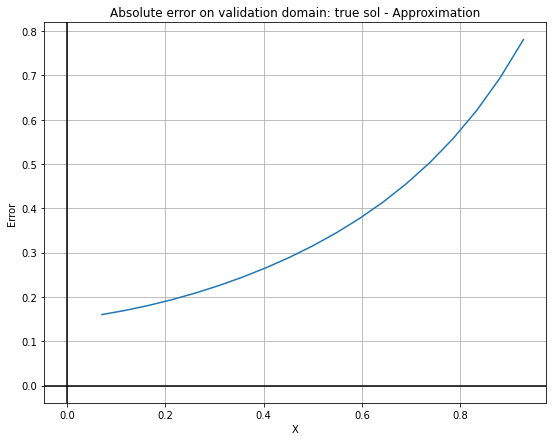

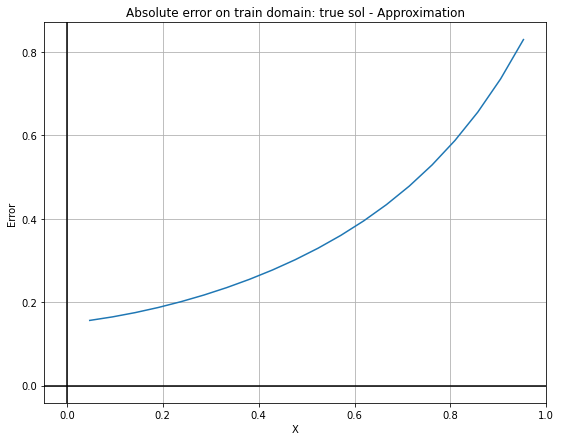

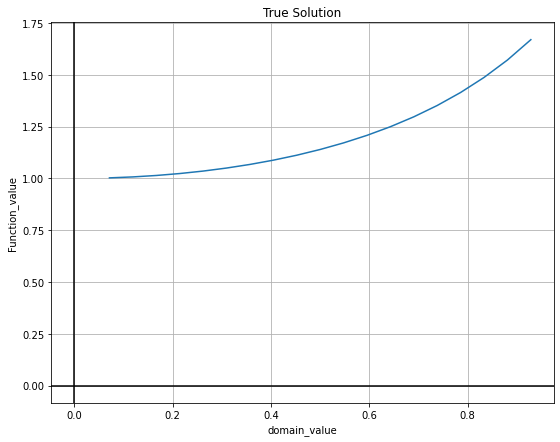

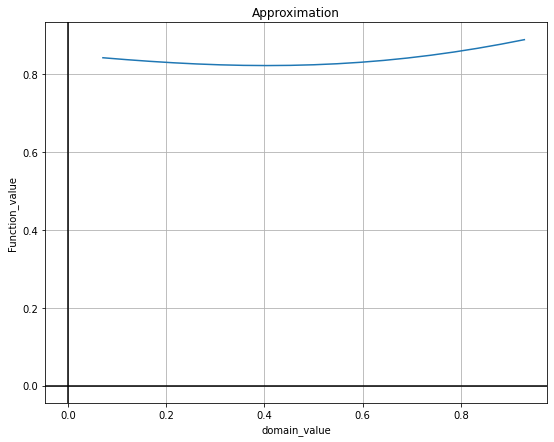

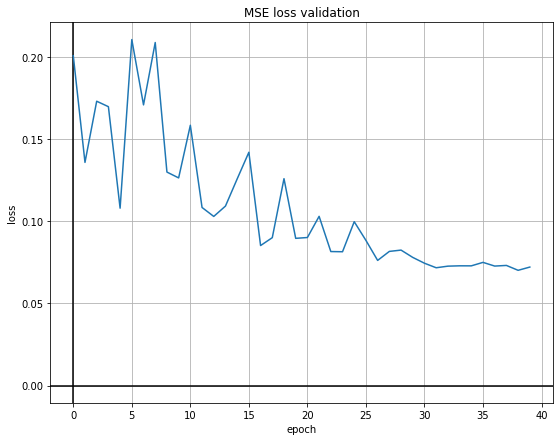

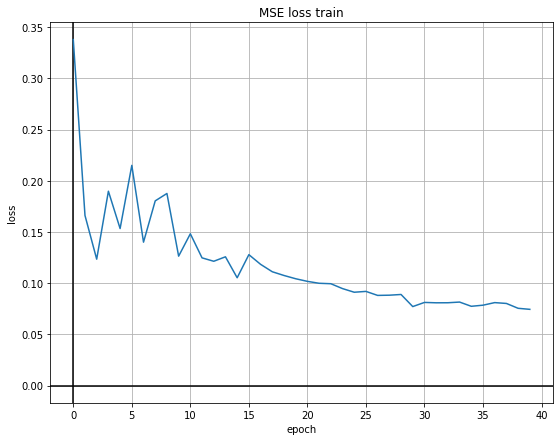

In [22]:
nn_ode_solver.make_report()

$$y'''+ y'' = \frac{x-1}{x^2}$$
$$ y(1) = \frac{1+e}{e}$$
$$ y'(1) = -\frac{1+e}{e} $$
$$ y''(1) = \frac{1-e}{e} $$
$$ true\_sol =  -4x + xln(x) + 7 - 2exp(1-x) + exp(-x)$$

In [25]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + (1+e)/e
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - (1-e)/e
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 1.5915
valid Loss: 2.4373
Epoch 1/39:
train Loss: 1.6899
valid Loss: 1.1560
Epoch 2/39:
train Loss: 1.4446
valid Loss: 1.4726
Epoch 3/39:
train Loss: 1.2050
valid Loss: 0.7366
Epoch 4/39:
train Loss: 0.5048
valid Loss: 0.4905
Epoch 5/39:
train Loss: 0.3422
valid Loss: 0.4257
Epoch 6/39:
train Loss: 0.4989
valid Loss: 0.6704
Epoch 7/39:
train Loss: 0.3674
valid Loss: 0.1964
Epoch 8/39:
train Loss: 0.3224
valid Loss: 0.1871
Epoch 9/39:
train Loss: 0.0938
valid Loss: 0.1237
Epoch 10/39:
train Loss: 0.2008
valid Loss: 0.2355
Epoch 11/39:
train Loss: 0.1553
valid Loss: 0.0952
Epoch 12/39:
train Loss: 0.0741
valid Loss: 0.0449
Epoch 13/39:
train Loss: 0.0459
valid Loss: 0.0522
Epoch 14/39:
train Loss: 0.0812
valid Loss: 0.0388
Epoch 15/39:
train Loss: 0.0209
valid Loss: 0.0484
Epoch 16/39:
train Loss: 0.0456
valid Loss: 0.0313
Epoch 17/39:
train Loss: 0.0226
valid Loss: 0.0354
Epoch 18/39:
train Loss: 0.0385
valid Loss: 0.0254
Epoch 19/39:
train Loss: 0.0263
valid Los

Train max absolute error: 0.011101201176643372
Valid max absolute error: 0.010787546634674072


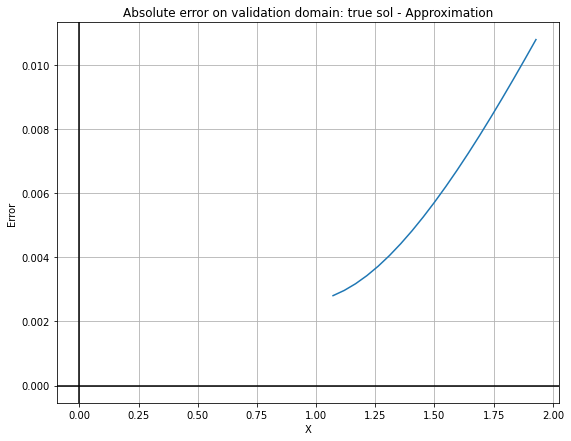

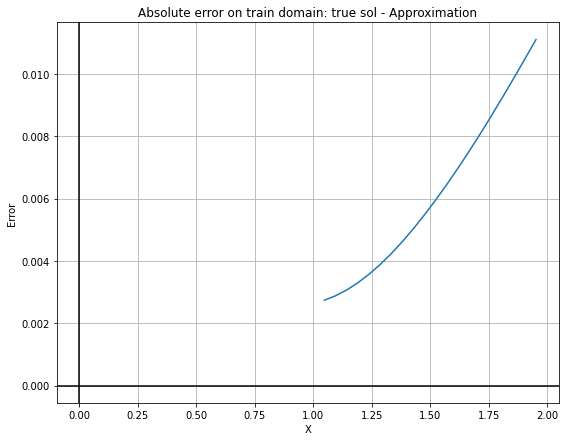

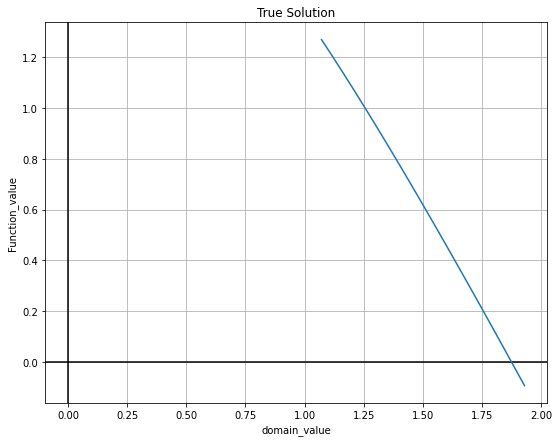

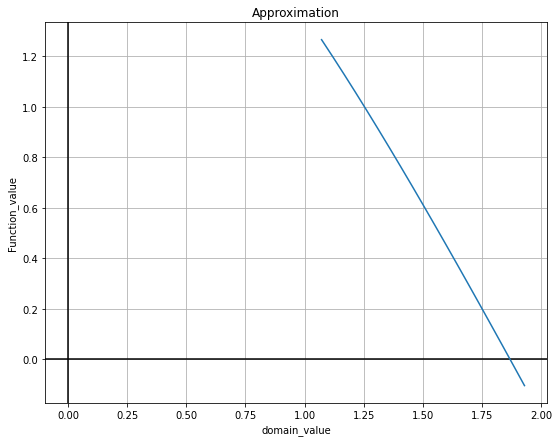

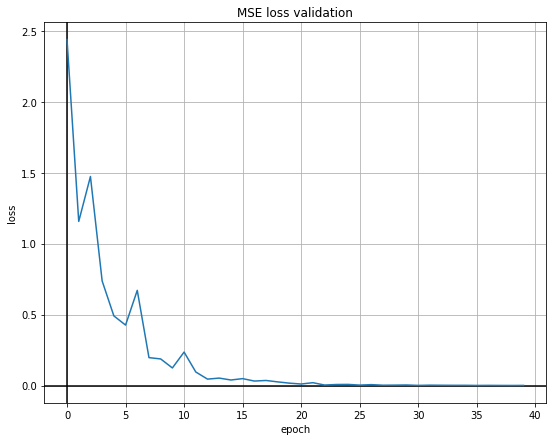

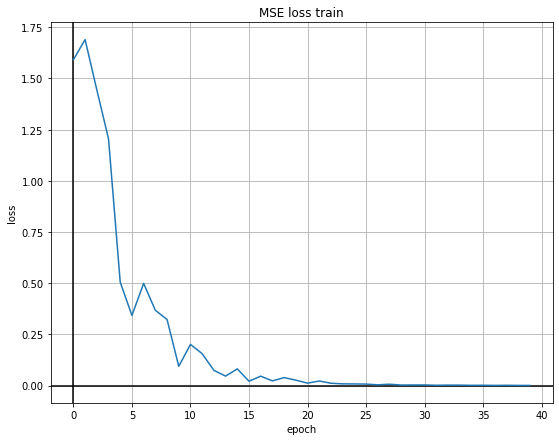

In [26]:
nn_ode_solver.make_report()

$$y''''+ y'' = \frac{1 + sin^2(x)}{cos^3(x)}$$
$$ y(0) = 1 $$
$$ y'(0) = 0 $$
$$ y''(0) = 0 $$
$$ y'''(0) = 0 $$
$$ func\_appr = 1 + x^4 * NN(x) $$
$$ true\_sol =  cos(x) + ln(cos(x))*cos(x) + x * sin(x)$$

In [27]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (1 + torch.sin(variable)*torch.sin(variable))/(torch.cos(variable))**3
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 1
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]

true_solution = lambda x: torch.cos(x) + torch.log(torch.cos(x))* torch.cos(x) + x * torch.sin(x)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 10.5195
valid Loss: 7.5918
Epoch 1/39:
train Loss: 4.6862
valid Loss: 4.4883
Epoch 2/39:
train Loss: 3.8024
valid Loss: 3.4671
Epoch 3/39:
train Loss: 4.8584
valid Loss: 3.1149
Epoch 4/39:
train Loss: 4.9638
valid Loss: 3.2761
Epoch 5/39:
train Loss: 4.2189
valid Loss: 2.5799
Epoch 6/39:
train Loss: 4.2386
valid Loss: 3.1325
Epoch 7/39:
train Loss: 2.6164
valid Loss: 2.1246
Epoch 8/39:
train Loss: 3.7076
valid Loss: 2.0408
Epoch 9/39:
train Loss: 5.7402
valid Loss: 4.4650
Epoch 10/39:
train Loss: 3.2132
valid Loss: 2.0505
Epoch 11/39:
train Loss: 3.7512
valid Loss: 2.7233
Epoch 12/39:
train Loss: 2.1358
valid Loss: 1.8472
Epoch 13/39:
train Loss: 2.6401
valid Loss: 2.2142
Epoch 14/39:
train Loss: 2.0237
valid Loss: 1.6522
Epoch 15/39:
train Loss: 2.1850
valid Loss: 1.0776
Epoch 16/39:
train Loss: 2.0726
valid Loss: 1.3974
Epoch 17/39:
train Loss: 0.8613
valid Loss: 0.6981
Epoch 18/39:
train Loss: 1.6411
valid Loss: 0.6533
Epoch 19/39:
train Loss: 5.9063
valid Lo

Train max absolute error: 0.03316766023635864
Valid max absolute error: 0.031865835189819336


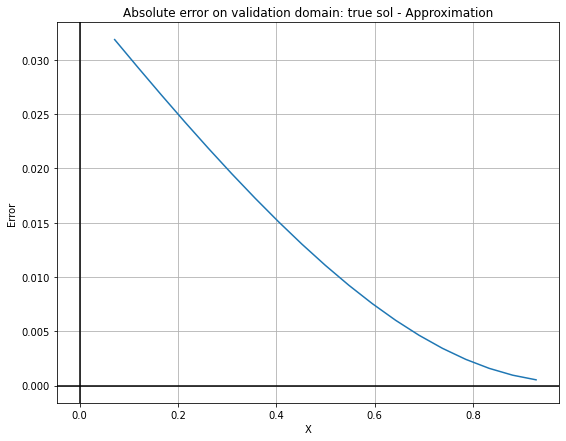

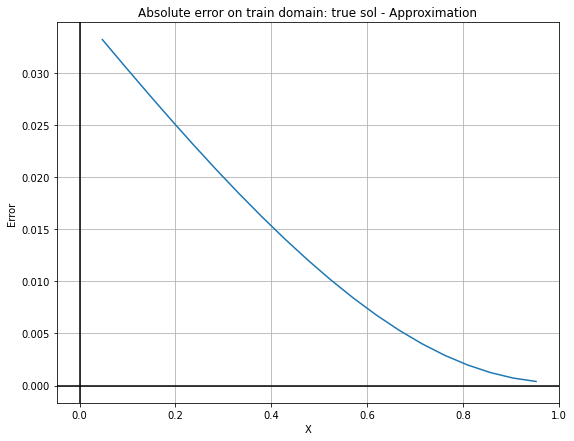

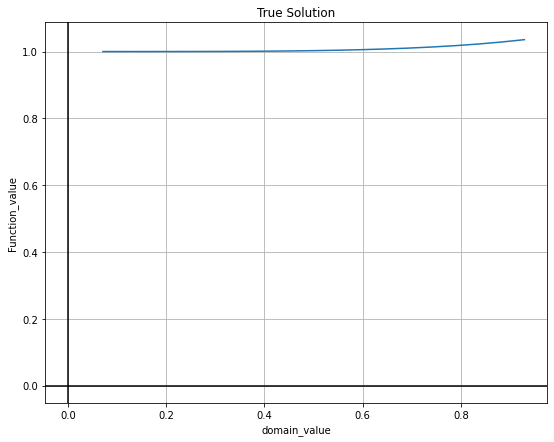

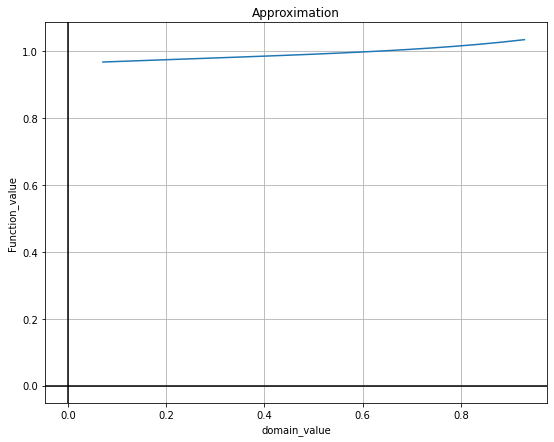

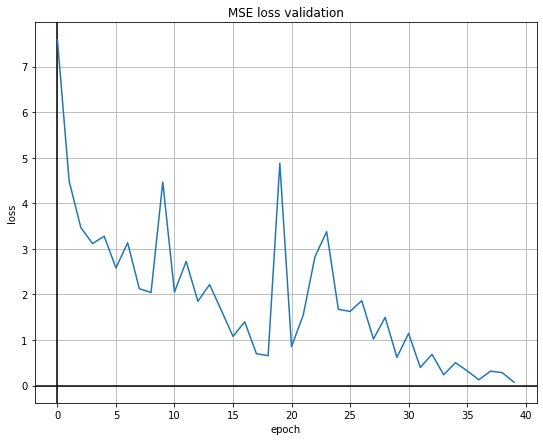

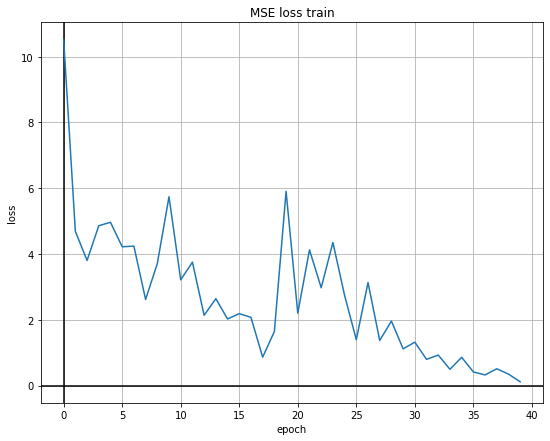

In [28]:
nn_ode_solver.make_report()

$$y'''+ y' = x*sin(x) + 3*cos(x)$$
$$ y(0) = 1$$
$$ y'(0) = 2 $$
$$ y''(0) = 0 $$
$$ true\_sol =  1/4 * (-(x^2 - 17) * sin(x) - 9 * x * cos(x) + 4)$$

In [29]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 1
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
nn_ode_solver = NN_Solver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/39:
train Loss: 6.5696
valid Loss: 5.2657
Epoch 1/39:
train Loss: 4.1334
valid Loss: 3.2828
Epoch 2/39:
train Loss: 2.9426
valid Loss: 2.1267
Epoch 3/39:
train Loss: 1.7558
valid Loss: 1.4809
Epoch 4/39:
train Loss: 1.3812
valid Loss: 1.1606
Epoch 5/39:
train Loss: 0.6575
valid Loss: 0.7946
Epoch 6/39:
train Loss: 0.8193
valid Loss: 0.4706
Epoch 7/39:
train Loss: 0.4763
valid Loss: 0.1857
Epoch 8/39:
train Loss: 0.3942
valid Loss: 0.4310
Epoch 9/39:
train Loss: 0.1071
valid Loss: 0.1117
Epoch 10/39:
train Loss: 0.1701
valid Loss: 0.0881
Epoch 11/39:
train Loss: 0.1510
valid Loss: 0.0884
Epoch 12/39:
train Loss: 0.1403
valid Loss: 0.1237
Epoch 13/39:
train Loss: 0.0919
valid Loss: 0.1168
Epoch 14/39:
train Loss: 0.0582
valid Loss: 0.1117
Epoch 15/39:
train Loss: 0.0725
valid Loss: 0.0659
Epoch 16/39:
train Loss: 0.0465
valid Loss: 0.0540
Epoch 17/39:
train Loss: 0.0546
valid Loss: 0.0324
Epoch 18/39:
train Loss: 0.0381
valid Loss: 0.0097
Epoch 19/39:
train Loss: 0.0264
valid Los

Train max absolute error: 0.018828630447387695
Valid max absolute error: 0.01882636547088623


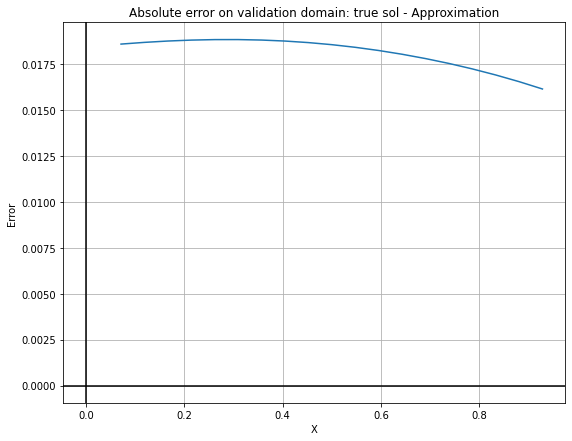

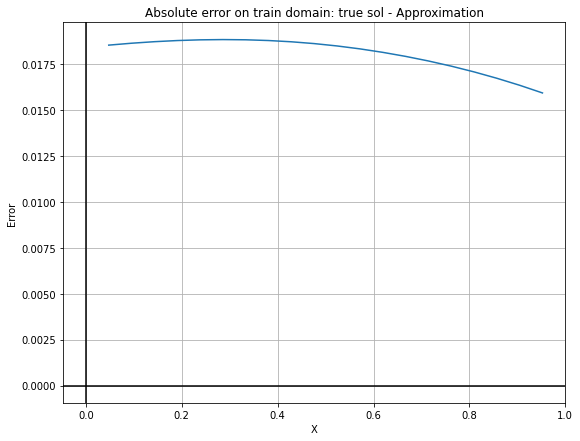

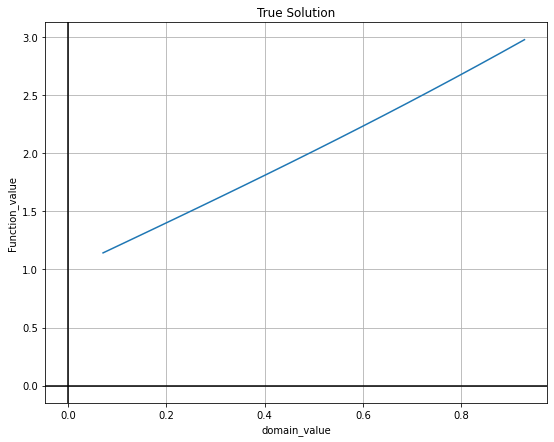

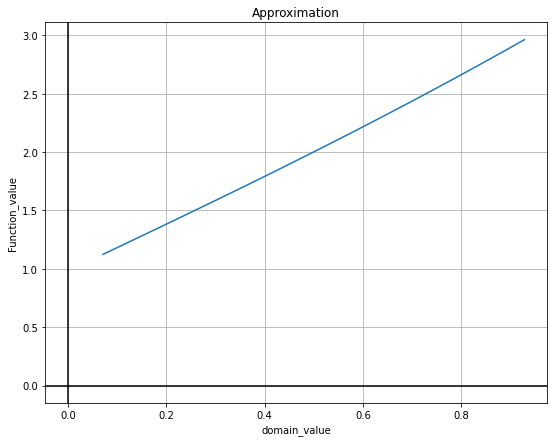

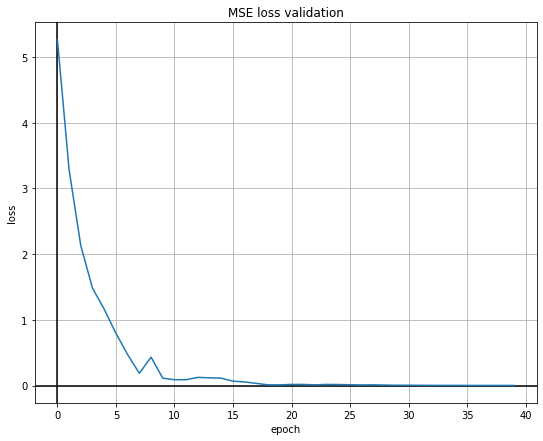

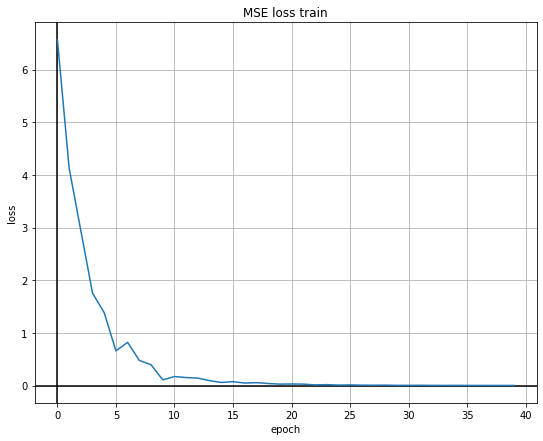

In [30]:
nn_ode_solver.make_report()